In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [2]:
X, y  = load_breast_cancer().data, load_breast_cancer().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((569, 30), (569, 1))

In [14]:
class nn_sigmoid(object):
    def __init__ (self, learning_rate = 0.005, n_iterations = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def fit(self, X,y):
        w_ = np.zeros(shape = (X.shape[1], 1))
        b_ = 0.0
        m_ = len(y)
        cost_ = []
        acc_ = []
        i = 1
        while(i != self.n_iterations):
            z  = np.dot(X,w_) + b_
            a = self.sigmoid(z)
            acc = self.acc(y,np.where(a>0.5,1,0),m_)
            acc_.append(acc)
            cost = -np.sum((y * np.log(a)) + (1-y) * np.log(1-a)) 
            cost_.append(cost)
            dw = (1/m_) * np.dot(X.T,(a-y)) 
            db = (1/m_) * np.sum(a-y)
            w_ -= self.learning_rate * dw
            b_ -= self.learning_rate * db
            if i % 100 ==0 :
                print(f'{i} epoch: cost {cost} and acc: {acc}')
            i +=1
        df = pd.DataFrame(cost_, columns=['cost'])
        df['acc'] = acc_
        df.plot(figsize = (14,6))
        plt.title('Cost Function Monitoring')
        plt.ylim(0,1)        
        return w_,b_,cost_
    
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def acc(self, y_true, y_pred,  m):
        return np.sum(y_true == y_pred)/m

100 epoch: cost 293.7774904810284 and acc: 0.8998242530755711
200 epoch: cost 255.7198565098425 and acc: 0.9068541300527241
300 epoch: cost 232.9102884629256 and acc: 0.9068541300527241
400 epoch: cost 217.04355890736224 and acc: 0.9068541300527241
500 epoch: cost 205.0911051769209 and acc: 0.9050966608084359
600 epoch: cost 195.6416953178507 and acc: 0.9086115992970123
700 epoch: cost 187.93362576467564 and acc: 0.9086115992970123
800 epoch: cost 181.51050238890662 and acc: 0.9086115992970123
900 epoch: cost 176.07498572645392 and acc: 0.9086115992970123


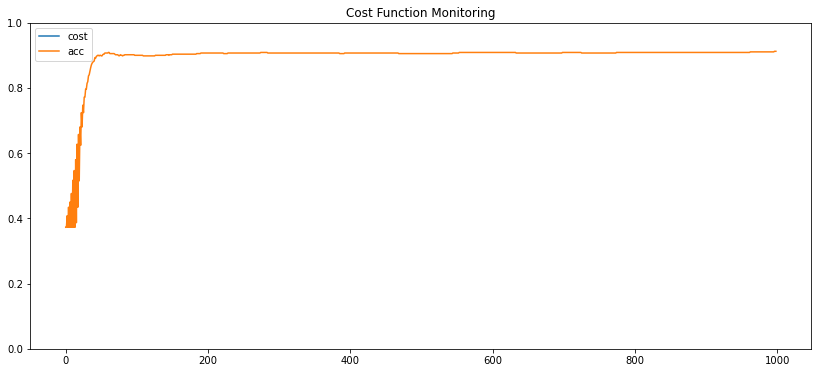

In [23]:
w_, b_ , cost_ = nn_sigmoid(learning_rate= 0.000005, n_iterations= 1000).fit(X,y)